### Importing required libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

### Importing csv file to jupyter 

In [3]:
df=pd.read_csv('E-Com-2.csv')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


###  Descriptions and Statistical analysis of data 

In [4]:
df.shape

(5630, 20)

In [5]:
df.size

112600

In [6]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [8]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.221492
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.193869
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.000000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.000000
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,325.000000


## Data Preprocessing

### Renaming column names

In [9]:
df.rename(columns={'Tenure':'Years','PreferredPaymentMode':'PaymentMode','PreferredLoginDevice':'Device','NumberOfDeviceRegistered':'TotalDevices','CustomerID':'ID','PreferedOrderCat':'Category'},inplace=True)

In [10]:
df.head()

,ID,Churn,Years,Device,CityTier,WarehouseToHome,PaymentMode,Gender,HourSpendOnApp,TotalDevices,Category,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


### Renaming reoccuring values

In [11]:
df['Device']=df['Device'].replace({'Mobile Phone':'Phone'})

In [12]:
df['PaymentMode'].value_counts()

PaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64

In [13]:
df['PaymentMode']=df['PaymentMode'].replace({'COD':'Cash-on-Delivery','CC':'Credit Card','Cash on Delivery':'Cash-on-Delivery'})

In [14]:
df['PaymentMode'].value_counts()

PaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash-on-Delivery     514
UPI                  414
Name: count, dtype: int64

### Total null values in the data

In [15]:
df.isnull().sum()

ID                               0
Churn                            0
Years                          264
Device                           0
CityTier                         0
WarehouseToHome                251
PaymentMode                      0
Gender                           0
HourSpendOnApp                 255
TotalDevices                     0
Category                         0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

### Delete Hours spent on app column

In [16]:
df.drop(columns='HourSpendOnApp',inplace=True)

In [17]:
df.head()

,ID,Churn,Years,Device,CityTier,WarehouseToHome,PaymentMode,Gender,TotalDevices,Category,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Phone,3,6.0,Debit Card,Female,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,Credit Card,Male,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


### Replacing null values in two columns with appropriate values

In [18]:
imp=SimpleImputer(strategy='mean')
df['WarehouseToHome']=imp.fit_transform(df[['WarehouseToHome']])

In [19]:
imp=SimpleImputer(strategy='median')
df['Years']=imp.fit_transform(df[['Years']])

In [20]:
df.head()

,ID,Churn,Years,Device,CityTier,WarehouseToHome,PaymentMode,Gender,TotalDevices,Category,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Phone,3,6.0,Debit Card,Female,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,9.0,Phone,1,8.0,UPI,Male,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,Credit Card,Male,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


### Deleting the rows with null values

In [21]:
df.dropna(inplace=True)

In [22]:
df.isnull().sum()

ID                             0
Churn                          0
Years                          0
Device                         0
CityTier                       0
WarehouseToHome                0
PaymentMode                    0
Gender                         0
TotalDevices                   0
Category                       0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [23]:
df.head()

,ID,Churn,Years,Device,CityTier,WarehouseToHome,PaymentMode,Gender,TotalDevices,Category,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Phone,3,6.0,Debit Card,Female,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,9.0,Phone,1,8.0,UPI,Male,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,9.0,Phone,1,30.0,Debit Card,Male,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,Credit Card,Male,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


## Common Queries

###  Q1 -  Which category saw the highest growth in orders from the last year ?

In [24]:
category=df.groupby('Category').sum()
category['OrderAmountHikeFromlastYear'].sort_values(ascending=False)

Category
Laptop & Accessory    31228.0
Mobile Phone          20495.0
Mobile                12371.0
Fashion                6741.0
Others                  303.0
Grocery                 117.0
Name: OrderAmountHikeFromlastYear, dtype: float64

 Laptop and Accessory has seen the most growth , while grocery has seen the least growth

###  Q2 - Who is more likely to churn , male or female ?

In [25]:
ch=df.groupby('Gender').sum()
ch['Churn']

Gender
Female    320
Male      534
Name: Churn, dtype: int64

Male is more likely to churn as compared to female

### Q3 - Does marital status affect the Satisfaction score for the product ?

In [26]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married     2368
Single      1522
Divorced     654
Name: count, dtype: int64

In [27]:
mar=df.groupby('MaritalStatus').sum()
single=mar['SatisfactionScore']['Single']/(df['MaritalStatus'].value_counts()['Single'])
married=mar['SatisfactionScore']['Married']/(df['MaritalStatus'].value_counts()['Married'])
div=mar['SatisfactionScore']['Divorced']/(df['MaritalStatus'].value_counts()['Divorced'])
mar={'Single':single,'Married':married,'Divorced':div}
mar

{'Single': 3.0243101182654404,
 'Married': 3.046875,
 'Divorced': 3.2217125382262997}

Martial status doesn't affect the satifaction score , by a large margin

###  Q4 - Which mode of payment gives highest cashback amount ?

In [28]:
mod=df.groupby('PaymentMode').sum()
mod['CashbackAmount'].sort_values(ascending=False)

PaymentMode
Debit Card          295269
Credit Card         217499
E wallet             81073
Cash-on-Delivery     68203
UPI                  53622
Name: CashbackAmount, dtype: int64

Debit card provides highest cashback amount to the users.

###  Q5 - How many mobile users are there, and how many consumers prefer computer ?

In [29]:
mob=df[df['Device']=='Phone']
com=df[df['Device']=='Computer']
print(len(mob),len(com))

3200 1344


3200 Mobile users and 1344 Desktop Users 

###  Q6 -  City Tier wise distribution of the number of orders received ?

In [30]:
city=df.groupby('CityTier').sum()
city['OrderCount']

CityTier
1    7608.0
2     397.0
3    3963.0
Name: OrderCount, dtype: float64

People from Tier-2 Cities have the least number of orders.

## VISUALISATION

### Modes of Payment

In [31]:
df['PaymentMode'].value_counts()

PaymentMode
Debit Card          1873
Credit Card         1405
E wallet             483
Cash-on-Delivery     437
UPI                  346
Name: count, dtype: int64

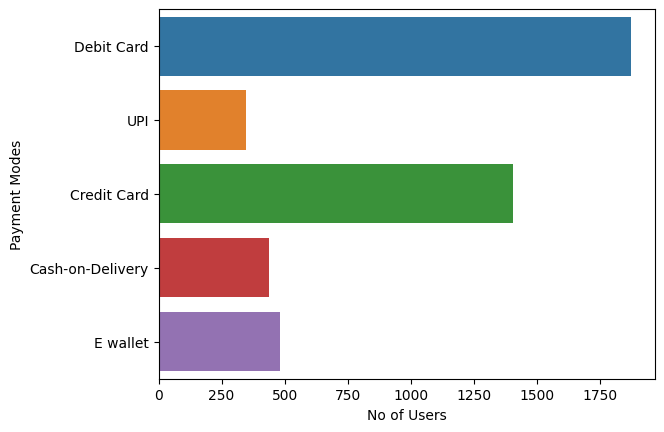

In [32]:
sns.countplot(y='PaymentMode',data=df)
plt.ylabel('Payment Modes')
plt.xlabel('No of Users')
plt.show()

### City Tier vs No of Complains

<AxesSubplot: xlabel='CityTier', ylabel='count'>

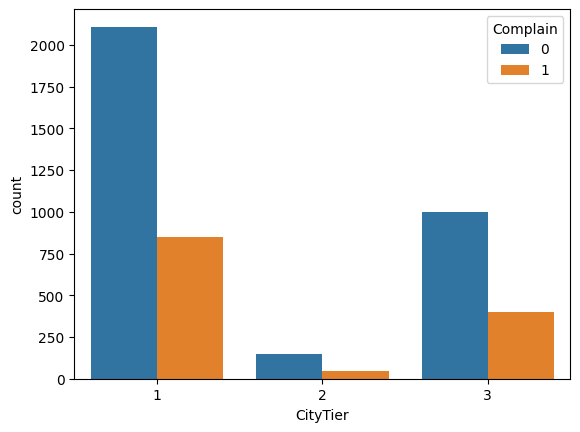

In [33]:
sns.countplot(data=df,x='CityTier',hue='Complain')

### Marital Status of the consumers

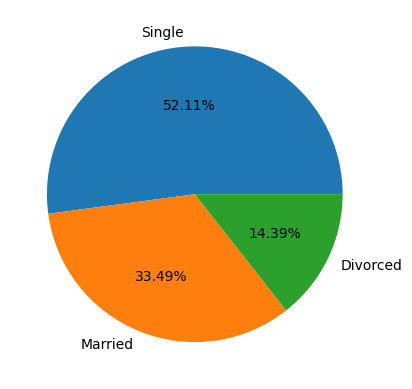

In [34]:
x=df['MaritalStatus'].value_counts()
plt.pie(x,labels=['Single','Married','Divorced'],autopct='%1.2f%%')
plt.show()

In [35]:
len(df[(df['CityTier']==1)&(df['Complain']==0)])

2109

### Category orders (Churn included)

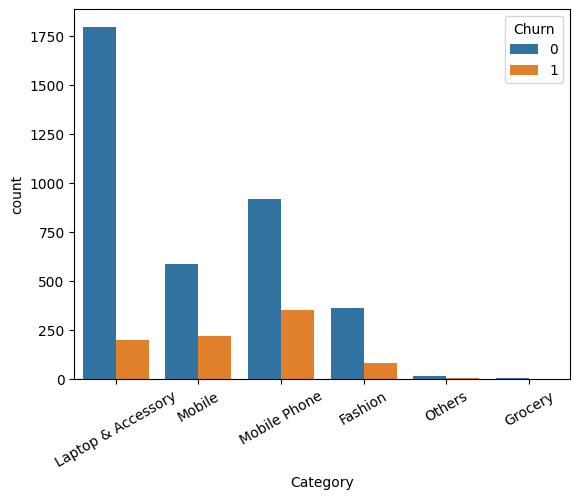

In [36]:
sns.countplot(data=df,x='Category',hue='Churn')
plt.xticks(rotation=30)
plt.show()

### Coupon Count vs Order Count

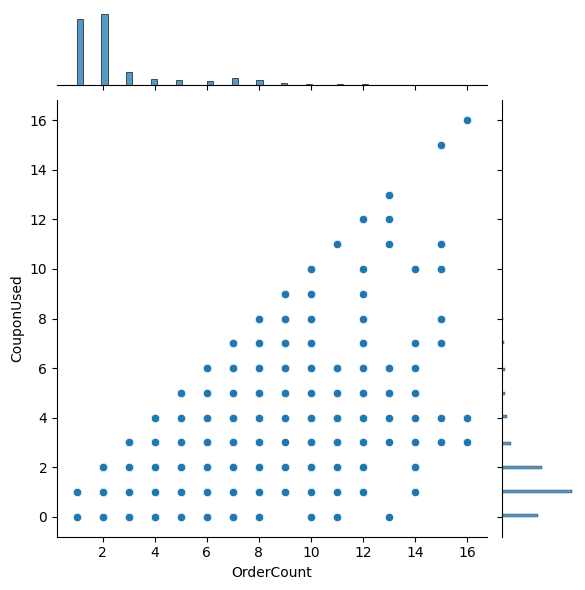

In [37]:
sns.jointplot(y='CouponUsed',x='OrderCount',data=df)

### KDE - probability density function of a continous random variable
### KDE FOR DISTANCE FROM WAREHOUSE TO HOME

<AxesSubplot: xlabel='WarehouseToHome', ylabel='Density'>

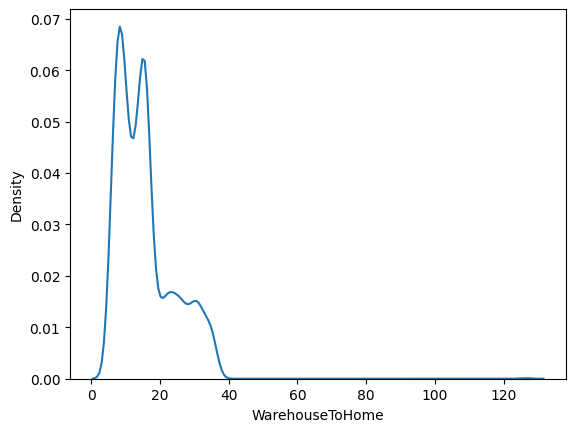

In [38]:
sns.kdeplot(df['WarehouseToHome'])

<AxesSubplot: xlabel='Years', ylabel='Density'>

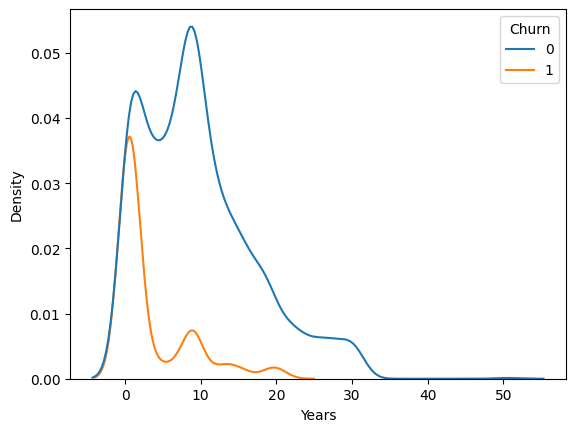

In [39]:
sns.kdeplot(df,x=df['Years'],hue='Churn')

In [40]:
df[(df['Years']>25 )&(df['Churn']==1)]

,ID,Churn,Years,Device,CityTier,WarehouseToHome,PaymentMode,Gender,TotalDevices,Category,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount


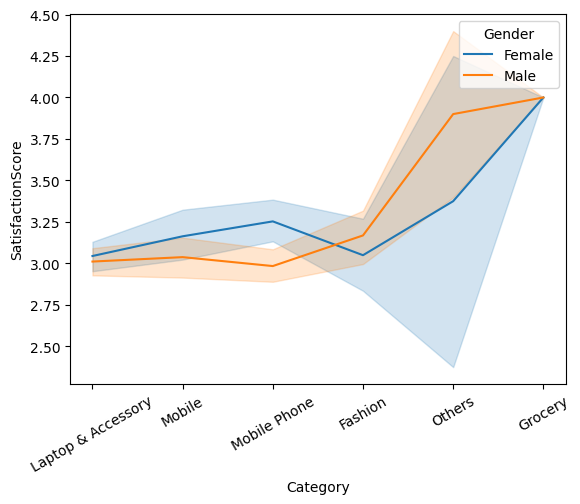

In [41]:
sns.lineplot(y=df['SatisfactionScore'],x=df['Category'],data=df,hue='Gender')
plt.xticks(rotation=30)
plt.show()

In [ ]:
sns.histplot(df['OrderAmountHikeFromlastYear'],bins=10,color='orange',edgecolor='black',kde=True)
plt.show()

In [ ]:
sns.boxplot(x=df['Churn'],y=df['DaySinceLastOrder'],data=df)

In [ ]:
df.head(20)

In [ ]:
df.corr()